<a href="https://colab.research.google.com/github/aditishrivastava12/Ethnic-Essence/blob/main/Spam_Email_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("SMSSpamCollection.txt" , sep="\t", names=["label" ,"message"])

In [ ]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

In [ ]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [ ]:
data.duplicated().sum()

403

In [ ]:
data = data.drop_duplicates()

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.shape

(5169, 2)

In [ ]:
data['label'].value_counts()

ham     4516
spam     653
Name: label, dtype: int64

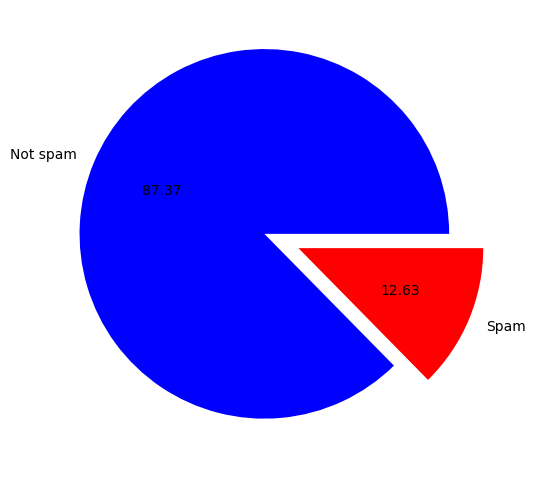

In [ ]:
plt.figure(figsize=(10,6))

plt.pie(data['label'].value_counts(), labels=['Not spam','Spam'], autopct='%0.2f', colors=['Blue' , 'Red'] , explode=[.1,.1])
plt.show()

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['num_characters']=data['message'].apply(len)
data.head()

,label,message,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
from nltk.tokenize import word_tokenize
data['message'].apply(lambda x: nltk.word_tokenize(x))



0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568      [Will, ü, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: message, Length: 5169, dtype: object

In [ ]:
data['num_words'] = data['message'].apply(lambda x:len(nltk.word_tokenize(x)))
data.head()

,label,message,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
data['num_sentences'] = data['message'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()

,label,message,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
data[data['label']=='ham'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
data[data['label']=='spam'][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

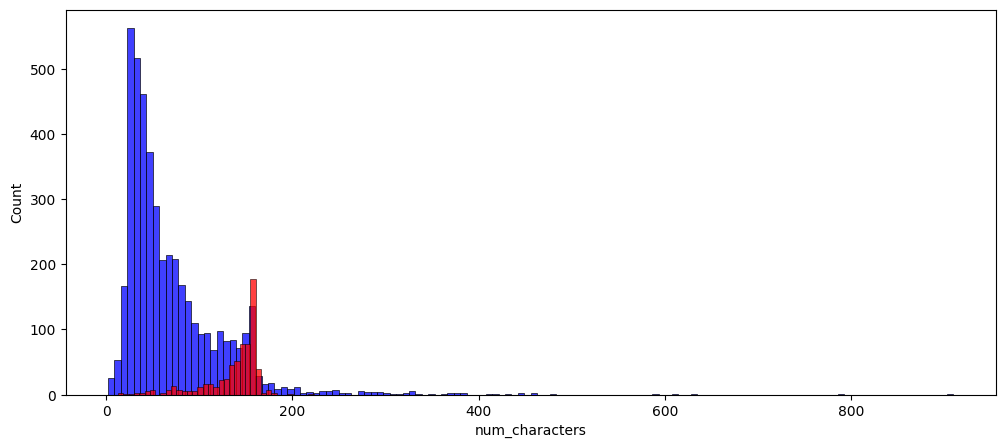

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data[data['label']=='ham']['num_characters'],color='blue')
sns.histplot(data[data['label']=='spam']['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

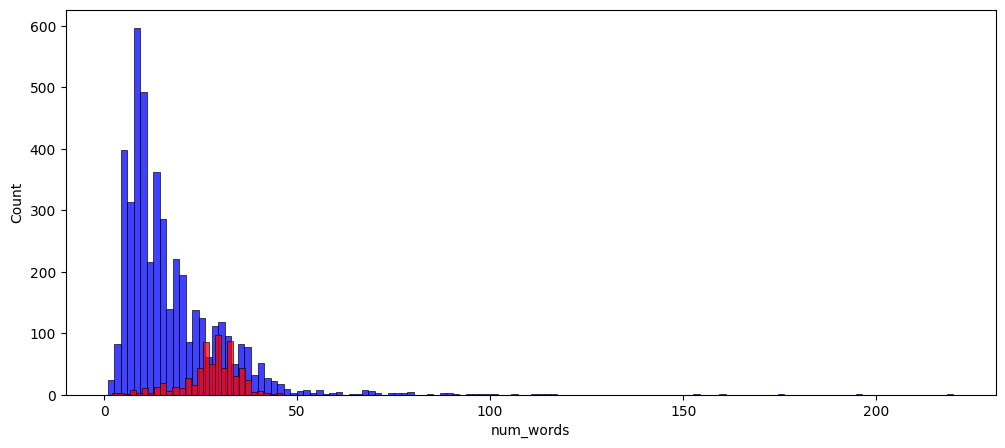

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data[data['label']=='ham']['num_words'],color='blue')
sns.histplot(data[data['label']=='spam']['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

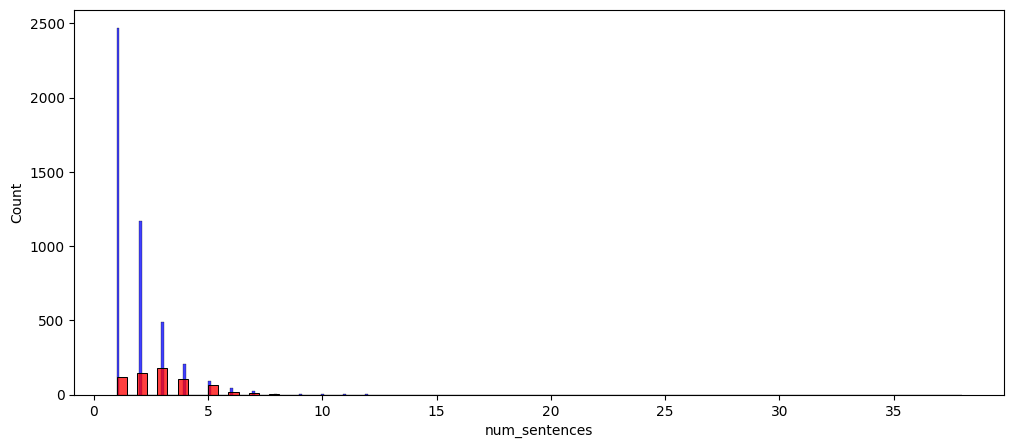

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(data[data['label']=='ham']['num_sentences'],color='blue')
sns.histplot(data[data['label']=='spam']['num_sentences'],color='red')

In [ ]:
from wordcloud import WordCloud

In [ ]:
not_spam_text = data[data.label == 'ham'].message
spam_text = data[data.label == 'spam'].message

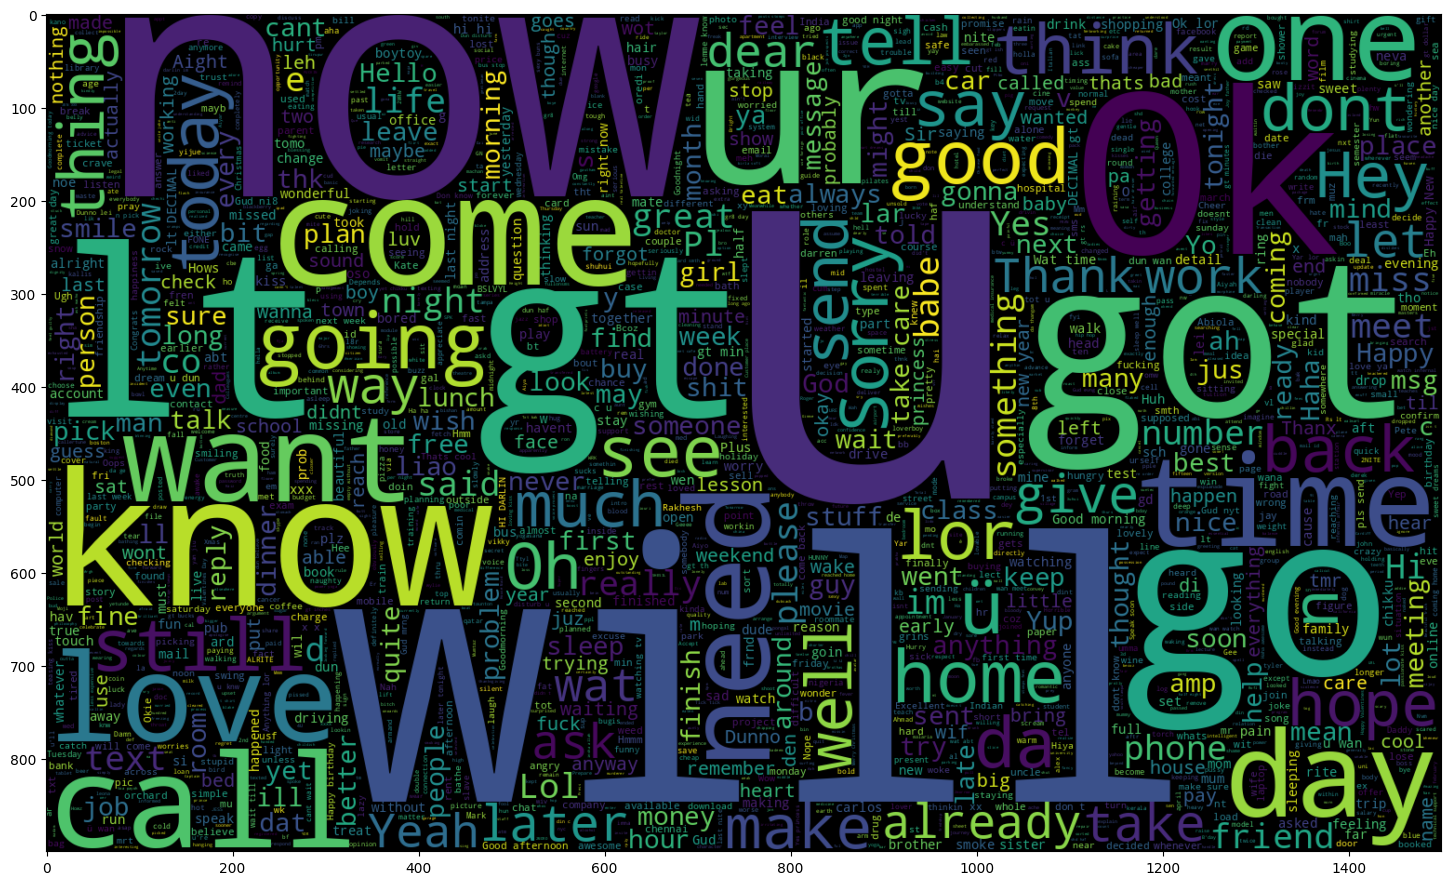

In [ ]:
# word cloud for not spam messages

plt.figure(figsize = (18, 20))
wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(not_spam_text))
plt.imshow(wc, interpolation='bilinear')

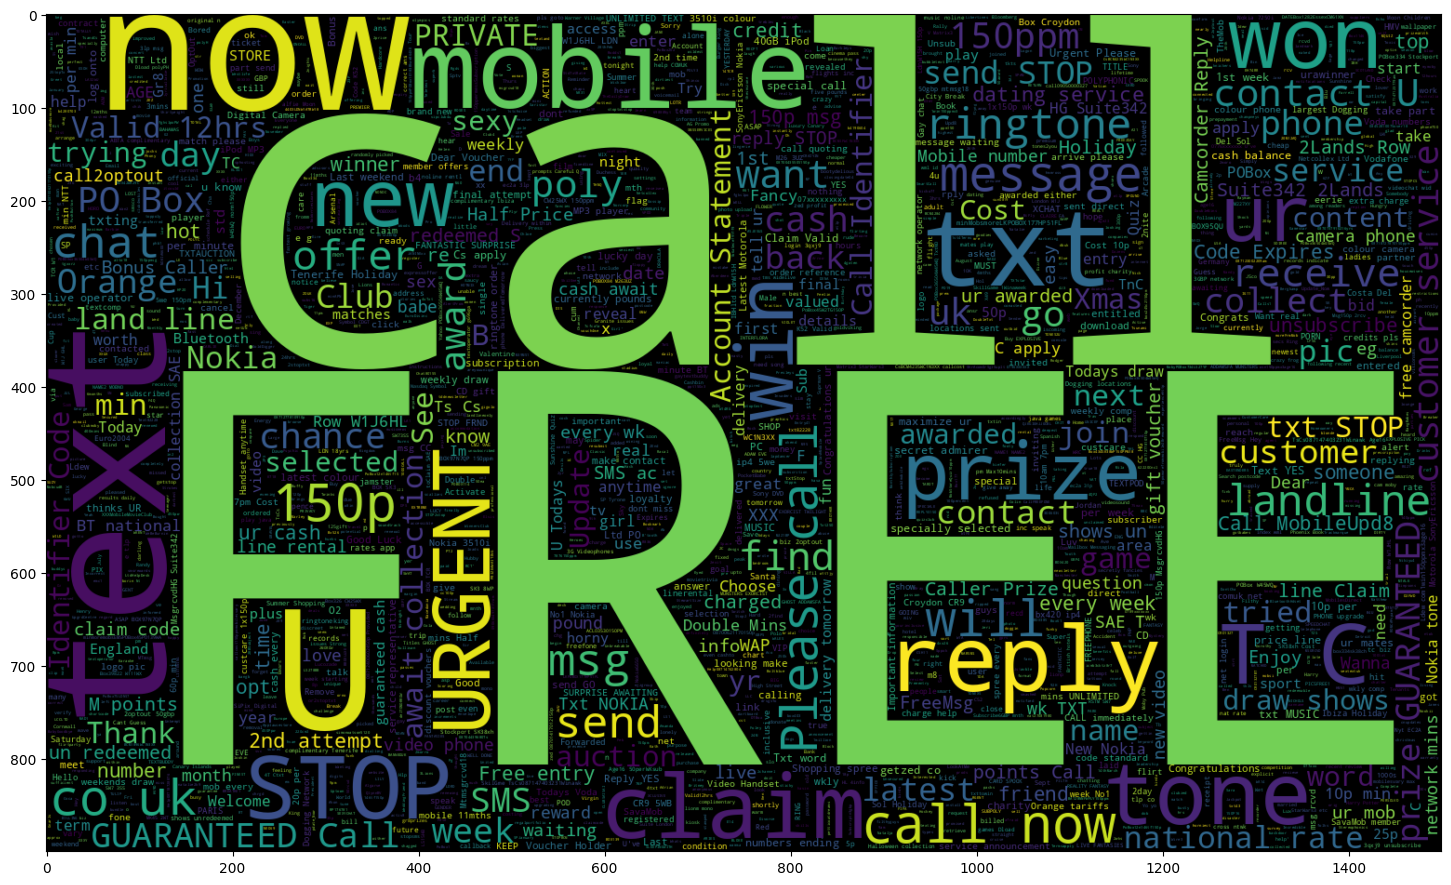

In [ ]:
# word cloud for spam messages

plt.figure(figsize = (18, 20))
wc = WordCloud(width = 1500, height = 900, max_words = 2500).generate(" ".join(spam_text))
plt.imshow(wc, interpolation='bilinear')

In [ ]:
data['message'][8]

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [ ]:
def remove_punc(text):
  trans = str.maketrans('', '', string.punctuation)
  return text.translate(trans)

In [ ]:
data['message']= data['message'].apply(remove_punc)

In [ ]:
data['message'][8]

'WINNER As a valued network customer you have been selected to receivea £900 prize reward To claim call 09061701461 Claim code KL341 Valid 12 hours only'

In [ ]:
def remove_noise(text):
  t = re.sub('[^a-zA-z]', ' ', text)
  return t

In [ ]:
data['message']= data['message'].apply(remove_noise)

In [ ]:
data['message'][8]

'WINNERAsavaluednetworkcustomeryouhavebeenselectedtoreceiveaprizerewardToclaimcallClaimcodeKLValidhoursonly'

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
sw = stopwords.words('english')
len(sw)

179

In [ ]:
def remove_sws(text):
  s = [word.lower() for word in text.split() if word.lower() not in sw]
  return " ".join(s)

In [ ]:
data['message']= data['message'].apply(remove_sws)

In [ ]:
data['message'][2]

'freeentryinawklycomptowinfacupfinaltktsstmaytextfatotoreceiveentryquestionstdtxtratetcsapplyovers'

In [ ]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
  l = [lemmatizer.lemmatize(word) for word in text.split()]
  return " ".join(l)

In [ ]:
data['message'] = data['message'].apply(lemma)

In [ ]:
data.head()

,label,message,num_characters,num_words,num_sentences
0,ham,gountiljurongpointcrazyavailableonlyinbugisngr...,111,24,2
1,ham,oklarjokingwifuoni,29,8,2
2,spam,freeentryinawklycomptowinfacupfinaltktsstmayte...,155,37,2
3,ham,udunsaysoearlyhorucalreadythensay,49,13,1
4,ham,nahidontthinkhegoestousfhelivesaroundherethough,61,15,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])


In [ ]:
data.head()

,label,message,num_characters,num_words,num_sentences
0,0,gountiljurongpointcrazyavailableonlyinbugisngr...,111,24,2
1,0,oklarjokingwifuoni,29,8,2
2,1,freeentryinawklycomptowinfacupfinaltktsstmayte...,155,37,2
3,0,udunsaysoearlyhorucalreadythensay,49,13,1
4,0,nahidontthinkhegoestousfhelivesaroundherethough,61,15,1


In [ ]:
data = data[['label' , 'message']]

In [ ]:
data.head()

,label,message
0,0,gountiljurongpointcrazyavailableonlyinbugisngr...
1,0,oklarjokingwifuoni
2,1,freeentryinawklycomptowinfacupfinaltktsstmayte...
3,0,udunsaysoearlyhorucalreadythensay
4,0,nahidontthinkhegoestousfhelivesaroundherethough


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [ ]:
X= tf.fit_transform(data['message']).toarray()
y = data['label']

In [ ]:
X

NameError: name 'X' is not defined

In [ ]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

In [ ]:
# split data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=32)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

In [ ]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Create the instance of Naive Bayes
clf = BernoulliNB()

In [ ]:
# Fit the data
clf.fit(X_train, y_train)

BernoulliNB()

In [ ]:
# Making prediction
y_pred = clf.predict(X_test)

In [ ]:
# Evaluation
print("Accuracy Score: ", accuracy_score(y_test, y_pred))

Accuracy Score:  0.8868471953578336


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       917
           1       0.00      0.00      0.00       117

    accuracy                           0.89      1034
   macro avg       0.44      0.50      0.47      1034
weighted avg       0.79      0.89      0.83      1034



Text(120.72222222222221, 0.5, 'Truth')

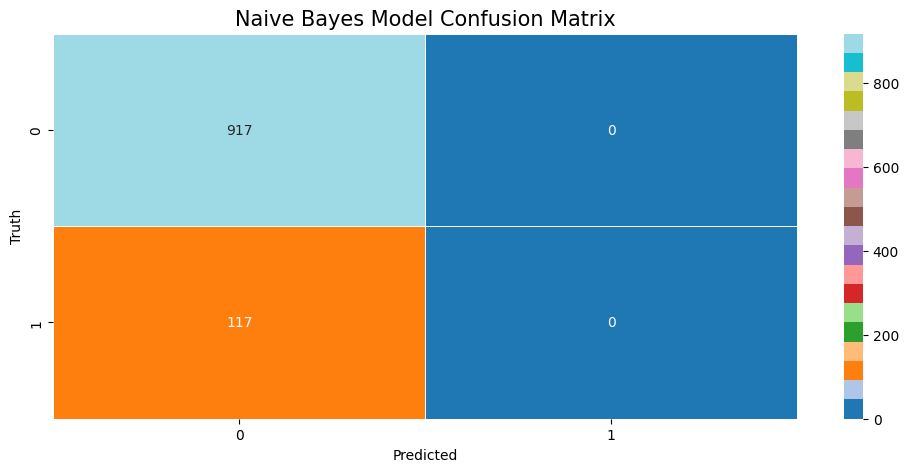

In [ ]:
# Plot the Confusion Matrix

import seaborn as sn
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (12,5))
sn.heatmap(cm, annot=True,linewidth = 0.5 , cmap = 'tab20' , fmt='d')
plt.title('Naive Bayes Model Confusion Matrix', size=15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(clf,open('model.pkl','wb'))

In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 34.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
!streamlit run spam_detector.py





  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.207.194:8501

